In [1]:
import pandas as pd
import numpy as np

from numpy.linalg import norm
from sklearn.decomposition import PCA

import itertools
import random

import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'random-test/test-network-features/'
header = range(1, 5)

In [3]:
features = pd.read_csv(path+'social_network_reduced_weighted.emb', sep=' ', header=None, skiprows=1)
features.head()

,0,1,2,3,4
0,8,-1.35466,1.46248,3.27580,2.75918
1,14,-1.05276,1.24633,2.87935,2.16541
2,5,-1.21743,1.01208,2.85333,2.31937
3,27,-1.52654,1.26368,3.51493,2.86168
4,13,-1.17375,1.26130,3.16554,2.34174


In [4]:
nodedata = pd.read_csv(path + 'social_reduced_nodes.csv', sep='\t')
nodedata.head()

,id,id_user,usertype
0,0,36361027,seed
1,1,6361512,seed
2,2,241709263,seed
3,3,397489668,seed
4,4,1305698738,seed


In [5]:
data = features.merge(nodedata, left_on=0, right_on='id')

In [6]:
pca = PCA(n_components=2)

In [7]:
X = pca.fit_transform(data[header])
vizdata = data.merge(pd.DataFrame(X, columns=['pca1', 'pca2']), left_index=True, right_index=True)

In [8]:
seeds = vizdata[vizdata['usertype'] == 'seed']
candidates = vizdata[vizdata['usertype'] == 'random']

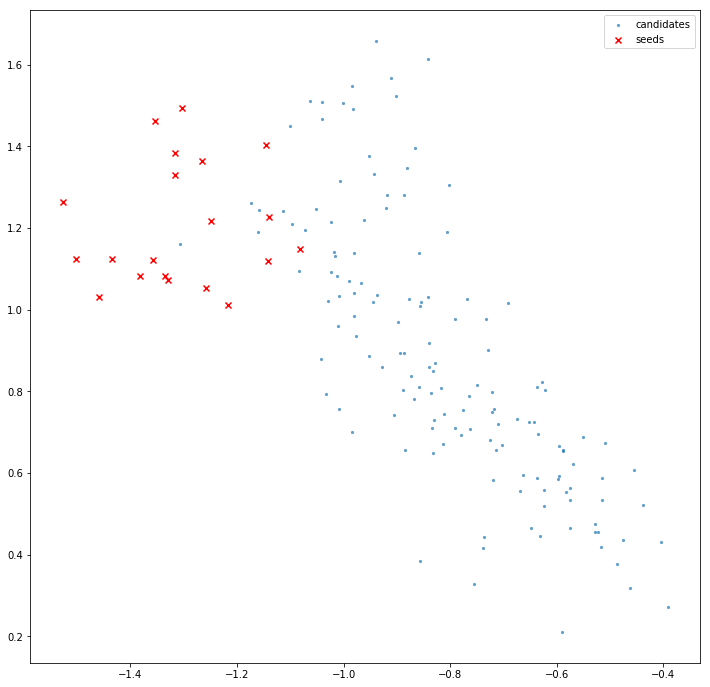

In [11]:
#x = 'pca1'
#y = 'pca2'
x = 1
y = 2

plt.figure(figsize=(12,12))
plt.scatter(candidates[x], candidates[y], marker='.', s=40, lw=0, alpha=0.7, label='candidates')
plt.scatter(seeds[x], seeds[y], marker='x', color='red', label='seeds')

plt.legend()